# Metadata explore

In this notebook, we use the `allDatasets` dataset from ERDDAP to examine the primary metadata of all glider missions

In [1]:
import utils
import datetime

In [2]:
e = utils.init_erddap()

# Fetch dataset list
e.response = "csv"
e.dataset_id = "allDatasets"
df_datasets = e.to_pandas(parse_dates=['minTime (UTC)', 'maxTime (UTC)'])

print(f"found {len(df_datasets)} datasets")

found 116 datasets


In [3]:
# drop the allDatasets row and make the datasetID the index for easier reading
df_datasets.set_index("datasetID", inplace=True)
df_datasets.drop("allDatasets", inplace=True)

In [4]:
df_datasets.head()

,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude (degrees_east),maxLongitude (degrees_east),longitudeSpacing (degrees_east),minLatitude (degrees_north),...,fgdc,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary
datasetID,,,,,,,,,,,,,,,,,,,,,
delayed_SEA068_M27,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Aster68-20220727T1709,19.885967,19.984983,NaN,58.199733,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-75days,0.495176,Summer 2022 Eastern Gotland Basin trials
nrt_SEA068_M27,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Aster68-20220727T1709,19.901883,19.982300,NaN,58.199850,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-35days,1.065697,Summer 2022 Eastern Gotland Basin trials
delayed_SEA069_M9,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Kalmus69-20220727T1637,19.882500,19.964250,NaN,58.192767,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-75days,0.494878,Summer 2022 Eastern Gotland Basin trials
nrt_SEA069_M9,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Kalmus69-20220727T1637,19.909683,19.964233,NaN,58.192767,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,now-35days,1.064720,Summer 2022 Eastern Gotland Basin trials
delayed_SEA055_M16,public,Voice of the Ocean Foundation,table,TimeSeries,EDDTableFromMultidimNcFiles,Kaprifol55-20201031T0902,15.692183,16.237867,NaN,55.471550,...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,(local files),https://cfconventions.org/cf-conventions/v1.6....,https://erddap.observations.voiceoftheocean.or...,https://erddap.observations.voiceoftheocean.or...,NaN,NaN,Part of SAMBA continuous monitoring


What metadata do we have acess to?

In [5]:
list(df_datasets)

['accessible',
 'institution',
 'dataStructure',
 'cdm_data_type',
 'class',
 'title',
 'minLongitude (degrees_east)',
 'maxLongitude (degrees_east)',
 'longitudeSpacing (degrees_east)',
 'minLatitude (degrees_north)',
 'maxLatitude (degrees_north)',
 'latitudeSpacing (degrees_north)',
 'minAltitude (m)',
 'maxAltitude (m)',
 'minTime (UTC)',
 'maxTime (UTC)',
 'timeSpacing (seconds)',
 'griddap',
 'subset',
 'tabledap',
 'MakeAGraph',
 'sos',
 'wcs',
 'wms',
 'files',
 'fgdc',
 'iso19115',
 'metadata',
 'sourceUrl',
 'infoUrl',
 'rss',
 'email',
 'testOutOfDate',
 'outOfDate',
 'summary']

### We can use this metadata to start queries. Which missions lasted the longest?

In [6]:
# Find datasets from deployments that lasted longer than a set number of days
df_datasets["endurance"] = df_datasets['maxTime (UTC)'] - df_datasets['minTime (UTC)']
min_days = 30
df_datasets[df_datasets["endurance"] > datetime.timedelta(days=min_days)].endurance

datasetID
delayed_SEA045_M41   34 days 03:09:14
delayed_SEA045_M43   32 days 23:24:15
delayed_SEA045_M44   32 days 01:33:04
delayed_SEA044_M32   34 days 03:45:59
delayed_SEA044_M34   32 days 22:45:43
delayed_SEA044_M35   32 days 01:31:50
Name: endurance, dtype: timedelta64[ns]

### Which glider missions extended to a depth of greater than 150 m in the seas northeast of Gotland?

In [16]:
min_altitude = -150# note the sign!
min_easting = 19
min_northing = 58
mask = (df_datasets['maxAltitude (m)'] < min_altitude).values \
* (df_datasets['maxLongitude (degrees_east)'] > min_easting).values \
* (df_datasets['maxLatitude (degrees_north)'] > min_northing).values
df_datasets[mask].index.values

array(['nrt_SEA068_M27', 'nrt_SEA069_M9', 'nrt_SEA067_M26',
       'nrt_SEA067_M27', 'nrt_SEA067_M29', 'nrt_SEA067_M30',
       'nrt_SEA066_M41', 'nrt_SEA066_M42'], dtype=object)

In [8]:
# Find missions where the dataset ID number doesn't match the name. This indicates the wrong dataset has been loaded

for dataset_id, row in df_datasets.iterrows():
    name = row["title"]
    if "SEA" not in dataset_id:
        continue
    num_title = int(name.split("-")[0][-2:])
    num_id = int(dataset_id.split("_")[1][-3:])
    if num_id != num_title:
        print(name, dataset_id)

---------------------

# Deeper metadata

To access metadata at the sensor level, we need to download the .das metadata for each dataset. This is currently a rather hacky text parsing job. Look at the function `get_meta` in `utils.py` for details

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

**NB!** Requesting the .das metadata for the delayed datasets can take over a minute per dataset. To speed things up, leave the top line of the following cell uncommonted, this will download deep metadata from only the nrt datasets.

In [10]:
df_datasets = df_datasets[df_datasets.index.str[:3] == "nrt"]
ds_meta = {}
for dataset_id in df_datasets.index:
    ds_meta[dataset_id] = utils.get_meta(dataset_id)

Example: Find datasets with backscatter

In [11]:
backscatter_missions = []
for dataset_id, meta in ds_meta.items():
    if "backscatter" in meta["variables"]:
        backscatter_missions.append(dataset_id)
print(f"NRT Missions that contain backscatter data: {backscatter_missions}")


NRT Missions that contain backscatter data: ['nrt_SEA068_M27', 'nrt_SEA069_M9', 'nrt_SEA055_M24', 'nrt_SEA055_M31', 'nrt_SEA055_M33', 'nrt_SEA055_M35', 'nrt_SEA055_M37', 'nrt_SEA055_M39', 'nrt_SEA055_M41', 'nrt_SEA055_M43', 'nrt_SEA044_M48', 'nrt_SEA067_M26', 'nrt_SEA067_M27', 'nrt_SEA067_M29', 'nrt_SEA067_M30', 'nrt_SEA066_M14', 'nrt_SEA066_M16', 'nrt_SEA066_M41', 'nrt_SEA066_M42', 'nrt_SEA061_M50', 'nrt_SEA061_M54', 'nrt_SEA061_M56', 'nrt_SEA061_M57', 'nrt_SEA061_M60', 'nrt_SEA061_M62', 'nrt_SEA061_M63']


# A more complex request


We're hunting for deoxygenation. Let's extract oxygen concentration from all deployments in the Baltic proper (east of 13 E) at depths greater than 70 m. First, let's just do CODA optode serial number 205592

In [12]:
e.variables = [
    "time",
    "pressure",
    "oxygen_concentration",
]

e.constraints = {
    "depth>=": 80,
    "longitude>=": 13,
}

coda_datasets = {}

for dataset_id, meta in ds_meta.items():
    oxy = meta["oxygen"]
    if  oxy["serial"] == "205592":
        e.dataset_id = dataset_id
        try:
            ds = e.to_xarray()
            coda_datasets[dataset_id] = ds
        except:
            print(f"no matching data in {dataset_id} for these constraints")

no matching data in nrt_SEA066_M16 for these constraints


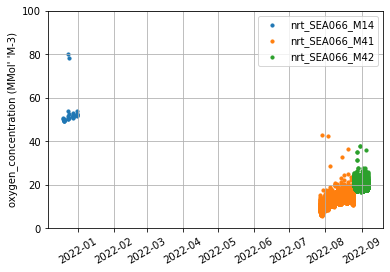

In [13]:
# Make a plot of the datasets
fig, ax = plt.subplots()
for name, ds in coda_datasets.items():
    ax.scatter(ds.time, ds.oxygen_concentration, label=name, s=10)
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=30);
ax.set(ylabel=f"{ds.oxygen_concentration.name} ({ds.oxygen_concentration.units})", ylim=(0, 100))
plt.grid()

In [14]:
# Find and print all unique oxygen optode serial numbers
serials = []
for dataset_id, meta in ds_meta.items():
    serials.append(meta["oxygen"]["serial"])
serials_uniq = list(set(serials))
serials_uniq.sort(reverse=True)
print(serials_uniq)

['206795', '206116', '206115', '205592', '0058', '0044', '0041', '0040', '0039', '0038']


no matching data in nrt_SEA066_M16 for these constraints
no matching data in nrt_SEA055_M41 for these constraints
no matching data in nrt_SEA055_M43 for these constraints
No datasets found for 0058
no matching data in nrt_SEA063_M33 for these constraints
no matching data in nrt_SEA063_M37 for these constraints
no matching data in nrt_SEA063_M38 for these constraints
no matching data in nrt_SEA063_M39 for these constraints
no matching data in nrt_SEA063_M40 for these constraints
no matching data in nrt_SEA044_M48 for these constraints
No datasets found for 0041
no matching data in nrt_SEA055_M31 for these constraints
no matching data in nrt_SEA055_M33 for these constraints
no matching data in nrt_SEA055_M35 for these constraints
no matching data in nrt_SEA055_M39 for these constraints
no matching data in nrt_SEA045_M54 for these constraints
no matching data in nrt_SEA045_M56 for these constraints
no matching data in nrt_SEA045_M62 for these constraints
no matching data in nrt_SEA045_M64

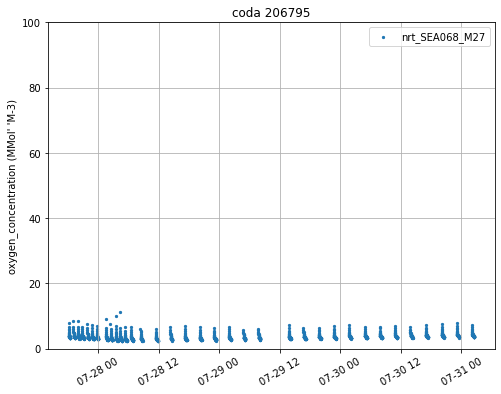

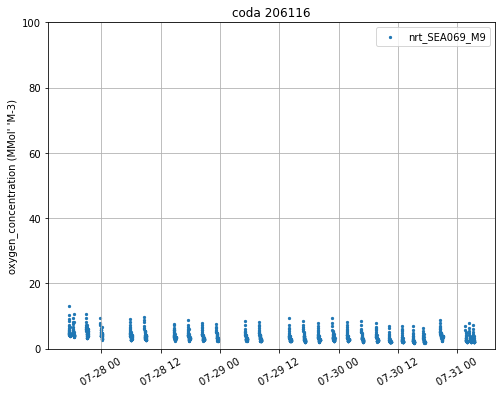

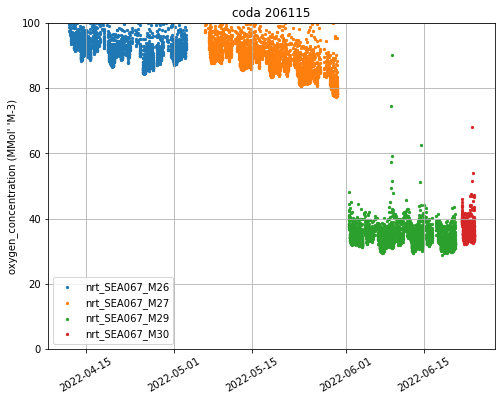

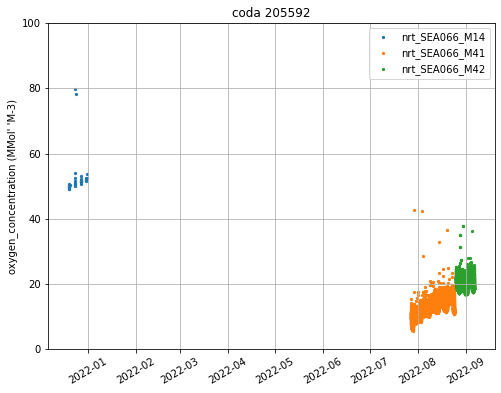

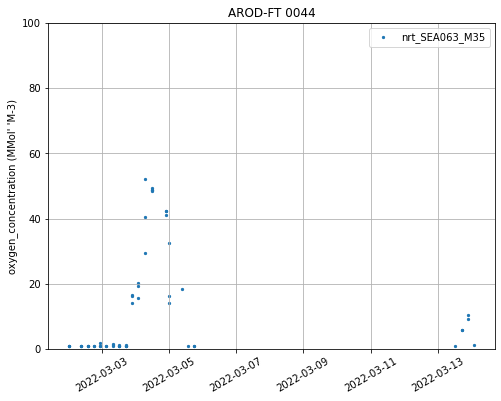

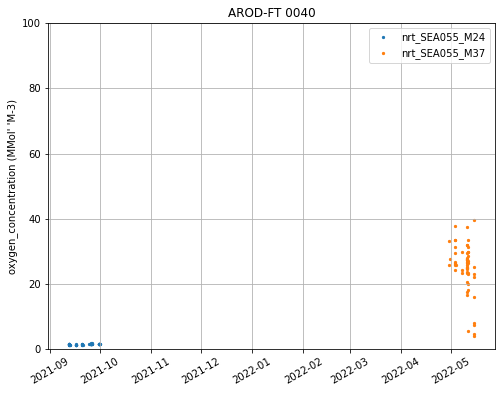

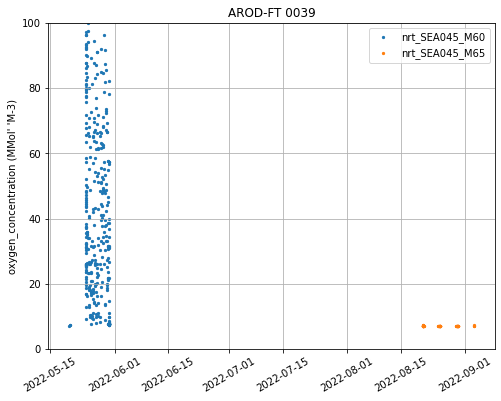

In [15]:
# Repeat the above test for all our optodes

for serial_no in serials_uniq:
    coda_datasets = {}

    for dataset_id, meta in ds_meta.items():
        oxy = meta["oxygen"]
        if oxy["serial"] == serial_no:
            e.dataset_id = dataset_id
            try:
                ds = e.to_xarray()
                coda_datasets[dataset_id] = ds
            except:
                print(f"no matching data in {dataset_id} for these constraints")
    if not coda_datasets:
        print(f"No datasets found for {serial_no}")
        continue
    fig, ax = plt.subplots(figsize=(8, 6))
    for dataset_id, ds in coda_datasets.items():
        oxy = ds_meta[dataset_id]["oxygen"]
        ax.scatter(ds.time, ds.oxygen_concentration, label=dataset_id, s=5)
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=30);
    title = f'{oxy["model"]} {oxy["serial"]}'
    ax.set(ylabel=f"{ds.oxygen_concentration.name} ({ds.oxygen_concentration.units})", ylim=(0, 100), title=title)
    plt.grid()
    fig.savefig(f'figures/{oxy["model"]}_{oxy["serial"]}.png')